In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_csv("C:\\Users\\ruhis\\OneDrive\\Desktop\\supply_chain_extended_data apanatime.csv")

In [63]:
df.head(4)

,Warehouse_ID,Location,Current_Stock,Demand_Forecast,Lead_Time_Days,Shipping_Time_Days,Stockout_Risk,Operational_Cost,Supplier_ID,Product_Category,Monthly_Sales,Order_Processing_Time,Return_Rate,Customer_Rating,Warehouse_Capacity,Storage_Cost,Transportation_Cost,Backorder_Quantity,Damaged_Goods,Employee_Count
0,WH239,Dallas,3926,484,8,3,7,93895,S693,Groceries,4893,4.766231,6.053952,3.840976,28701,16975,2778,228,26,83
1,WH244,Houston,3032,5122,3,6,25,46847,S880,Electronics,4453,4.304335,3.886996,2.113929,36198,14052,1535,288,16,39
2,WH340,Chicago,4763,4343,5,5,16,64176,S116,Furniture,5956,1.030779,7.335160,4.211437,22784,9863,13435,153,3,49
3,WH428,Atlanta,2219,777,7,6,15,38940,S431,Apparel,5814,2.871244,1.393481,1.751671,13172,15911,14508,143,39,35


In [64]:
df.isnull().mean( )

Warehouse_ID             0.0
Location                 0.0
Current_Stock            0.0
Demand_Forecast          0.0
Lead_Time_Days           0.0
Shipping_Time_Days       0.0
Stockout_Risk            0.0
Operational_Cost         0.0
Supplier_ID              0.0
Product_Category         0.0
Monthly_Sales            0.0
Order_Processing_Time    0.0
Return_Rate              0.0
Customer_Rating          0.0
Warehouse_Capacity       0.0
Storage_Cost             0.0
Transportation_Cost      0.0
Backorder_Quantity       0.0
Damaged_Goods            0.0
Employee_Count           0.0
dtype: float64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Warehouse_ID           500 non-null    object 
 1   Location               500 non-null    object 
 2   Current_Stock          500 non-null    int64  
 3   Demand_Forecast        500 non-null    int64  
 4   Lead_Time_Days         500 non-null    int64  
 5   Shipping_Time_Days     500 non-null    int64  
 6   Stockout_Risk          500 non-null    int64  
 7   Operational_Cost       500 non-null    int64  
 8   Supplier_ID            500 non-null    object 
 9   Product_Category       500 non-null    object 
 10  Monthly_Sales          500 non-null    int64  
 11  Order_Processing_Time  500 non-null    float64
 12  Return_Rate            500 non-null    float64
 13  Customer_Rating        500 non-null    float64
 14  Warehouse_Capacity     500 non-null    int64  
 15  Storag

#### Check datatypes

In [67]:
df.dtypes

Warehouse_ID              object
Location                  object
Current_Stock              int64
Demand_Forecast            int64
Lead_Time_Days             int64
Shipping_Time_Days         int64
Stockout_Risk              int64
Operational_Cost           int64
Supplier_ID               object
Product_Category          object
Monthly_Sales              int64
Order_Processing_Time    float64
Return_Rate              float64
Customer_Rating          float64
Warehouse_Capacity         int64
Storage_Cost               int64
Transportation_Cost        int64
Backorder_Quantity         int64
Damaged_Goods              int64
Employee_Count             int64
dtype: object

#### Top 10 warehouses with longest Total Delivery time

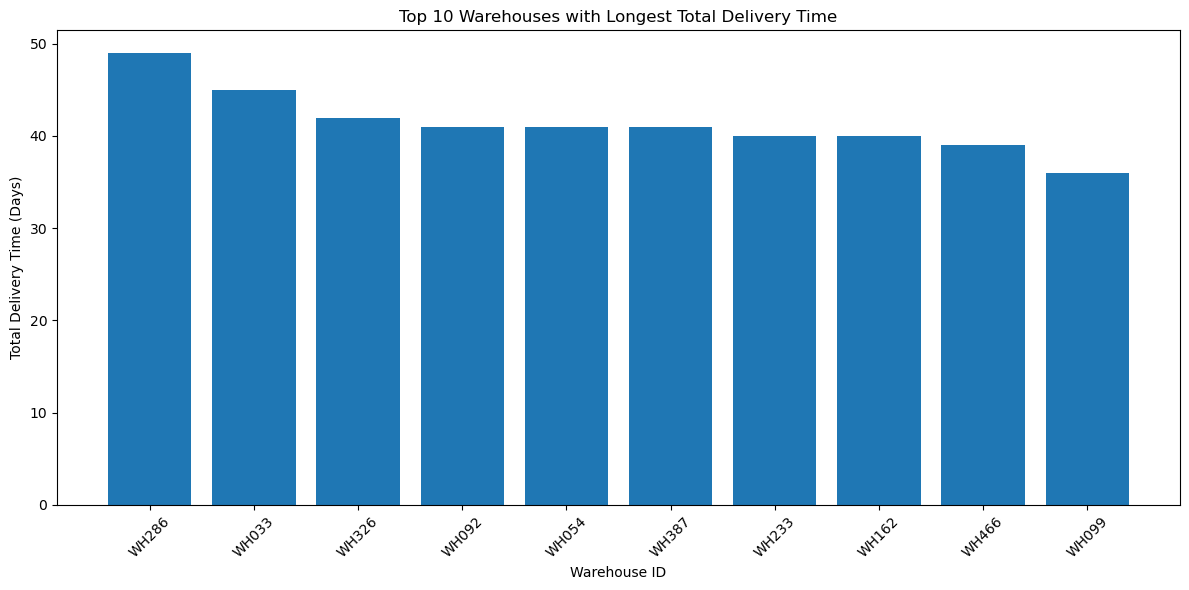

In [69]:


#  Group data by warehouse and calculate total delivery time
grouped = (
    df.groupby("Warehouse_ID")
      .agg({
          "Shipping_Time_Days": "sum",
          "Lead_Time_Days": "sum"
      })
)

#  Add total delivery time column
grouped["Total_Delivery_Time"] = (
    grouped["Shipping_Time_Days"] + grouped["Lead_Time_Days"]
)

#  Sort and take top 10 warehouses
top10 = grouped.sort_values("Total_Delivery_Time", ascending=False).head(10)

#  Plot bar chart
plt.figure(figsize=(12,6))
plt.bar(top10.index.astype(str), top10["Total_Delivery_Time"])
plt.xlabel("Warehouse ID")
plt.ylabel("Total Delivery Time (Days)")
plt.title("Top 10 Warehouses with Longest Total Delivery Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### added columns of Overstock and Understock

In [71]:
# Overstock = Current > demand_forecast
df["Overstock"] = df["Current_Stock"] - df["Demand_Forecast"]

# Understock = demand_forecast - Current
df["Understock"] = df["Demand_Forecast"] - df["Current_Stock"]

warehouse_stock = df.groupby("Warehouse_ID")[
    ["Current_Stock", "Demand_Forecast", "Overstock", "Understock"]
].sum()

print(warehouse_stock)


              Current_Stock  Demand_Forecast  Overstock  Understock
Warehouse_ID                                                       
WH001                  7528             7275        253        -253
WH002                  4387             2175       2212       -2212
WH005                  5339             6964      -1625        1625
WH006                  1314             4858      -3544        3544
WH007                  6616             5977        639        -639
...                     ...              ...        ...         ...
WH494                  3139             1614       1525       -1525
WH495                  6832             3607       3225       -3225
WH496                  4862             4621        241        -241
WH499                  7481             6661        820        -820
WH500                  4798             2861       1937       -1937

[313 rows x 4 columns]


In [72]:
df.head(3)

,Warehouse_ID,Location,Current_Stock,Demand_Forecast,Lead_Time_Days,Shipping_Time_Days,Stockout_Risk,Operational_Cost,Supplier_ID,Product_Category,...,Return_Rate,Customer_Rating,Warehouse_Capacity,Storage_Cost,Transportation_Cost,Backorder_Quantity,Damaged_Goods,Employee_Count,Overstock,Understock
0,WH239,Dallas,3926,484,8,3,7,93895,S693,Groceries,...,6.053952,3.840976,28701,16975,2778,228,26,83,3442,-3442
1,WH244,Houston,3032,5122,3,6,25,46847,S880,Electronics,...,3.886996,2.113929,36198,14052,1535,288,16,39,-2090,2090
2,WH340,Chicago,4763,4343,5,5,16,64176,S116,Furniture,...,7.335160,4.211437,22784,9863,13435,153,3,49,420,-420


In [73]:
# TOP 10 OVERSTOCK
top_overstock = warehouse_stock.sort_values("Overstock", ascending=False).head(10)

# TOP 10 UNDERSTOCK
top_understock = warehouse_stock.sort_values("Understock", ascending=True).head(10)


#### Top 10 Overstock Warehouses

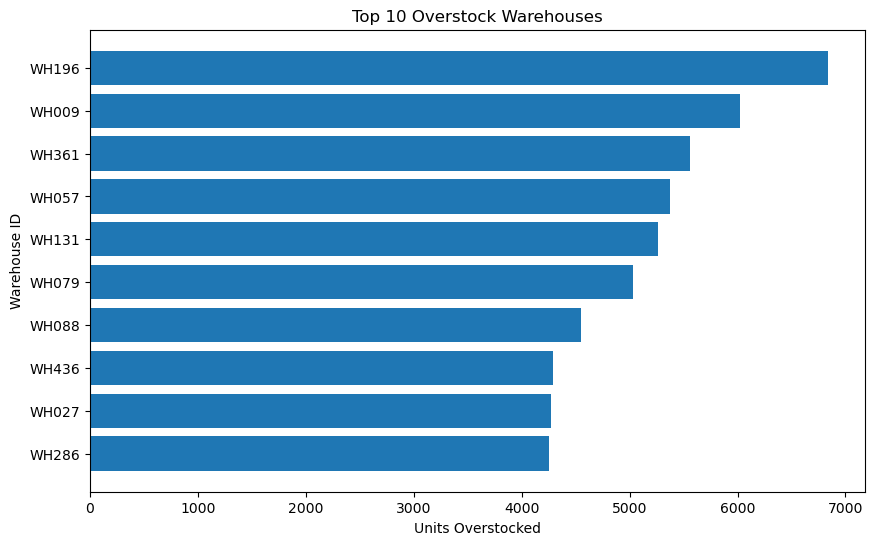

In [75]:
 # top 10 overstock warehouses 

plt.figure(figsize=(10,6))
plt.barh(top_overstock.index, top_overstock["Overstock"])
plt.title("Top 10 Overstock Warehouses")
plt.xlabel("Units Overstocked")
plt.ylabel("Warehouse ID")
plt.gca().invert_yaxis()
plt.show()


#### Top 10 Understock Warehouses

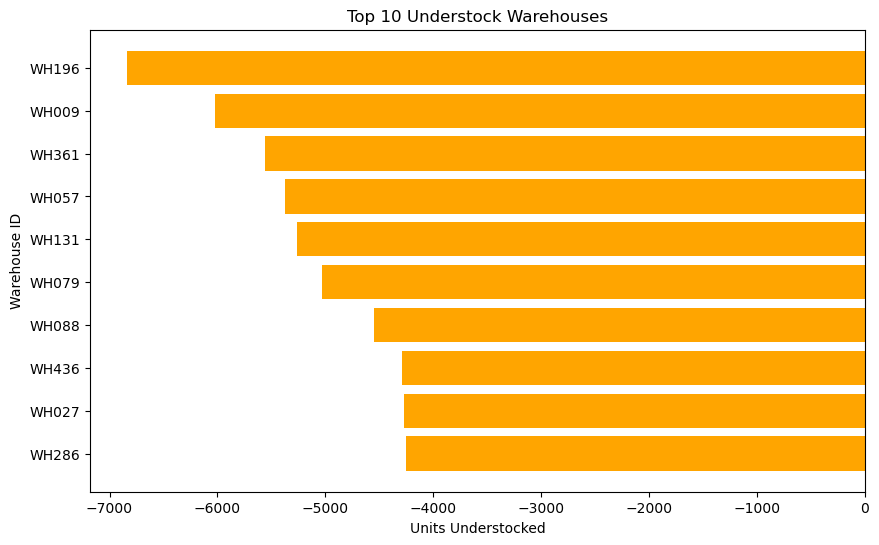

In [77]:
 # top 10 understock warehouses 
plt.figure(figsize=(10,6))
plt.barh(top_understock.index, top_understock["Understock"], color='orange')
plt.title("Top 10 Understock Warehouses")
plt.xlabel("Units Understocked")
plt.ylabel("Warehouse ID")
plt.gca().invert_yaxis()
plt.show()


#### added column of Total Cost

In [79]:
df["Total_Cost"] = (
    df["Operational_Cost"] +
    df["Storage_Cost"] +
    df["Transportation_Cost"]
)


#### Added Profit Column

In [81]:
df["Profit"] = df["Monthly_Sales"] - df["Total_Cost"]


In [82]:
df["Profit_Margin"] = df["Profit"] / df["Monthly_Sales"]


In [89]:
df.head(3)

,Warehouse_ID,Location,Current_Stock,Demand_Forecast,Lead_Time_Days,Shipping_Time_Days,Stockout_Risk,Operational_Cost,Supplier_ID,Product_Category,...,Storage_Cost,Transportation_Cost,Backorder_Quantity,Damaged_Goods,Employee_Count,Overstock,Understock,Total_Cost,Profit,Profit_Margin
0,WH239,Dallas,3926,484,8,3,7,93895,S693,Groceries,...,16975,2778,228,26,83,3442,-3442,113648,-108755,-22.226650
1,WH244,Houston,3032,5122,3,6,25,46847,S880,Electronics,...,14052,1535,288,16,39,-2090,2090,62434,-57981,-13.020660
2,WH340,Chicago,4763,4343,5,5,16,64176,S116,Furniture,...,9863,13435,153,3,49,420,-420,87474,-81518,-13.686702


#### Bottom 10 warehouses by Profit

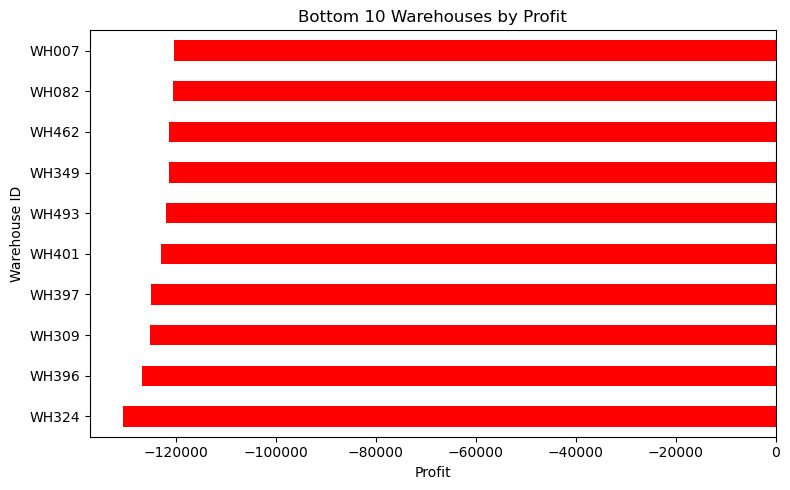

In [96]:

# Sort bottom 10 warehouses by profit
loss_warehouses = df.sort_values("Profit").head(10)

# Set Warehouse_ID as index 
loss_warehouses = loss_warehouses.set_index("Warehouse_ID")

# Plot
plt.figure(figsize=(8,5))
loss_warehouses["Profit"].plot(kind="barh", color="red")

plt.title("Bottom 10 Warehouses by Profit")
plt.xlabel("Profit")
plt.ylabel("Warehouse ID")
plt.tight_layout()
plt.show()


#### Top 10 Warehouses by Profit

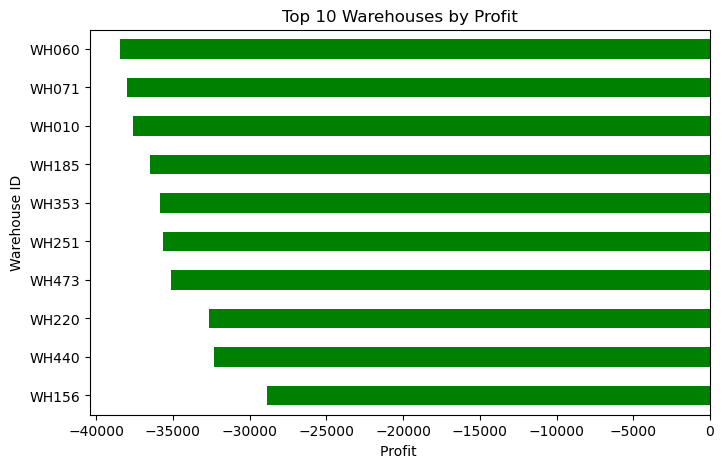

In [103]:
profit_warehouses = df.sort_values("Profit", ascending=False).head(10)
profit_warehouses = profit_warehouses.set_index("Warehouse_ID")

profit_warehouses["Profit"].plot(kind="barh", color="green", figsize=(8,5))
plt.title("Top 10 Warehouses by Profit")
plt.xlabel("Profit ")
plt.ylabel("Warehouse ID")
plt.show()


In [105]:
df[["Employee_Count","Operational_Cost","Profit"]].corr()


,Employee_Count,Operational_Cost,Profit
Employee_Count,1.000000,-0.025922,0.020820
Operational_Cost,-0.025922,1.000000,-0.938558
Profit,0.020820,-0.938558,1.000000


#### Relation between Operational_cost vs Profit

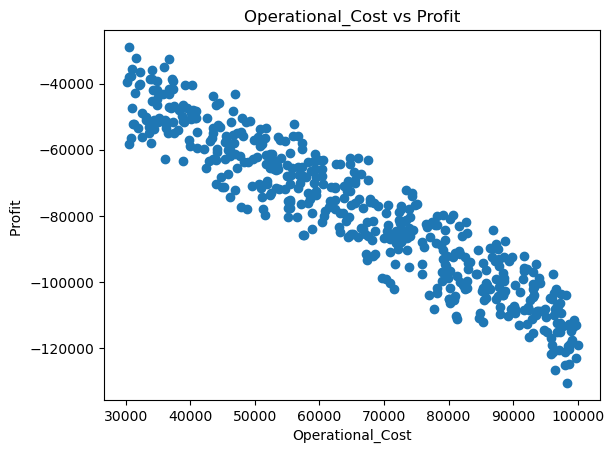

In [109]:
plt.scatter(df["Operational_Cost"], df["Profit"])
plt.xlabel("Operational_Cost")
plt.ylabel("Profit ")
plt.title("Operational_Cost vs Profit")
plt.show()


In [111]:
df[["Operational_Cost","Employee_Count","Overstock","Understock","Total_Cost","Profit","Profit_Margin"]].corr()

,Operational_Cost,Employee_Count,Overstock,Understock,Total_Cost,Profit,Profit_Margin
Operational_Cost,1.000000,-0.025922,-0.066740,0.066740,0.945420,-0.938558,-0.353136
Employee_Count,-0.025922,1.000000,-0.032028,0.032028,-0.016050,0.020820,0.010553
Overstock,-0.066740,-0.032028,1.000000,-1.000000,-0.066550,0.068588,0.038086
Understock,0.066740,0.032028,-1.000000,1.000000,0.066550,-0.068588,-0.038086
Total_Cost,0.945420,-0.016050,-0.066550,0.066550,1.000000,-0.993045,-0.365068
Profit,-0.938558,0.020820,0.068588,-0.068588,-0.993045,1.000000,0.452656
Profit_Margin,-0.353136,0.010553,0.038086,-0.038086,-0.365068,0.452656,1.000000


#### Profit by Location

<Axes: xlabel='Location'>

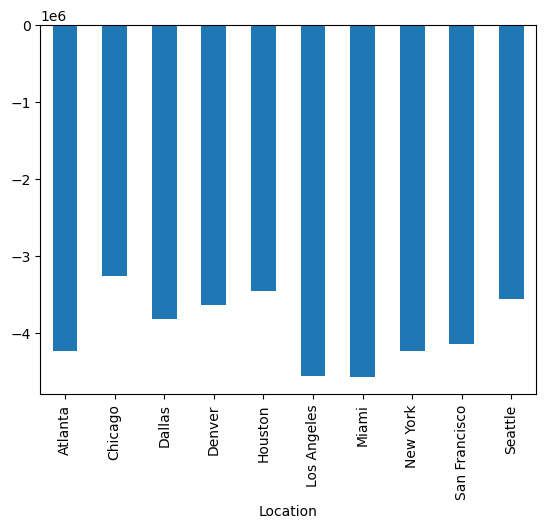

In [114]:
df.groupby("Location")["Profit"].sum().plot(kind="bar")


#### Profit by Category

<Axes: xlabel='Product_Category'>

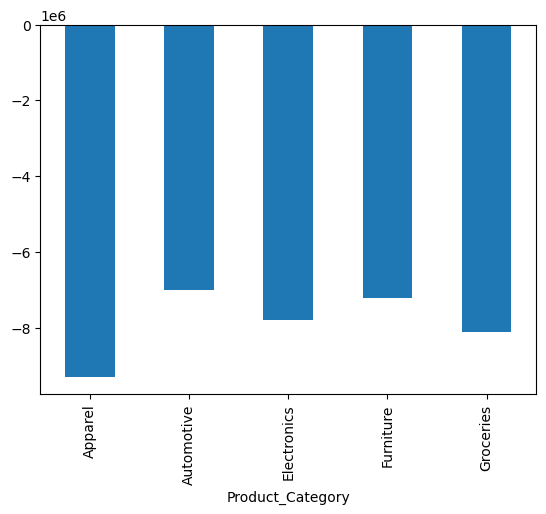

In [117]:
df.groupby("Product_Category")["Profit"].sum().plot(kind="bar")


In [119]:
df[["Operational_Cost","Shipping_Time_Days", "Order_Processing_Time", "Damaged_Goods", "Return_Rate","Employee_Count","Lead_Time_Days"]].corr( )

,Operational_Cost,Shipping_Time_Days,Order_Processing_Time,Damaged_Goods,Return_Rate,Employee_Count,Lead_Time_Days
Operational_Cost,1.000000,-0.042142,0.014077,0.011240,0.038251,-0.025922,-0.001646
Shipping_Time_Days,-0.042142,1.000000,0.022550,0.041578,-0.015585,-0.015554,0.024546
Order_Processing_Time,0.014077,0.022550,1.000000,-0.030492,0.041456,0.004596,0.002306
Damaged_Goods,0.011240,0.041578,-0.030492,1.000000,-0.080969,0.042758,-0.021606
Return_Rate,0.038251,-0.015585,0.041456,-0.080969,1.000000,0.014163,0.044055
Employee_Count,-0.025922,-0.015554,0.004596,0.042758,0.014163,1.000000,0.006065
Lead_Time_Days,-0.001646,0.024546,0.002306,-0.021606,0.044055,0.006065,1.000000


In [121]:
df[["Operational_Cost","Profit","Storage_Cost","Transportation_Cost","Backorder_Quantity","Damaged_Goods","Customer_Rating"]].corr( )	

,Operational_Cost,Profit,Storage_Cost,Transportation_Cost,Backorder_Quantity,Damaged_Goods,Customer_Rating
Operational_Cost,1.000000,-0.938558,0.006687,0.096792,-0.002009,0.011240,-0.016701
Profit,-0.938558,1.000000,-0.268163,-0.291348,-0.021899,0.023778,0.004583
Storage_Cost,0.006687,-0.268163,1.000000,0.039084,0.063543,-0.081983,0.088543
Transportation_Cost,0.096792,-0.291348,0.039084,1.000000,0.050393,-0.055152,-0.054804
Backorder_Quantity,-0.002009,-0.021899,0.063543,0.050393,1.000000,-0.045972,-0.014965
Damaged_Goods,0.011240,0.023778,-0.081983,-0.055152,-0.045972,1.000000,0.020337
Customer_Rating,-0.016701,0.004583,0.088543,-0.054804,-0.014965,0.020337,1.000000


#### Operational_cost by Location and Product_category

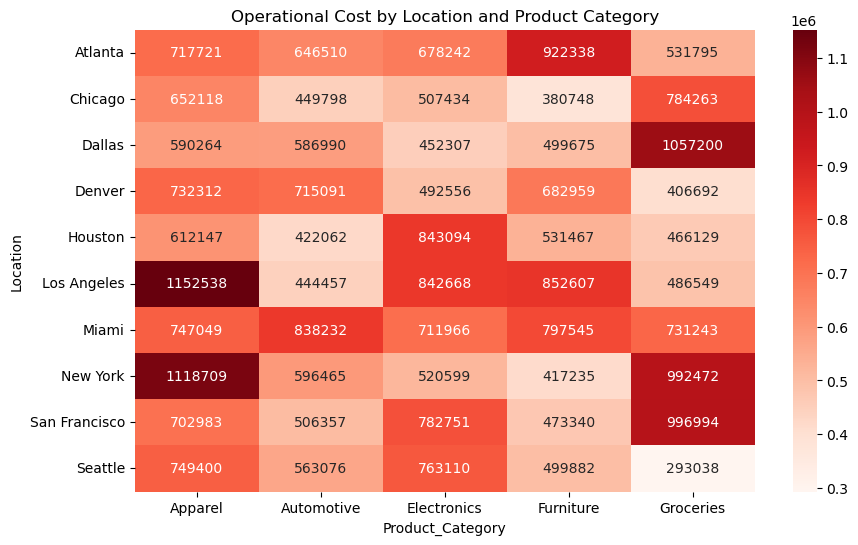

In [124]:
pivot = df.pivot_table(
    values='Operational_Cost',
    index='Location',
    columns='Product_Category',
    aggfunc='sum'
)

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='Reds')
plt.title("Operational Cost by Location and Product Category")
plt.show()

#### Customer_rating by Location and Product_category

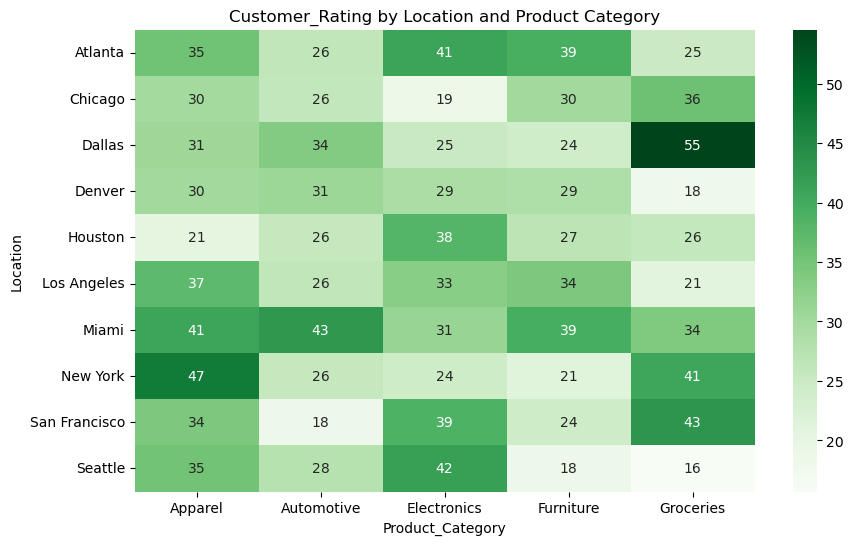

In [127]:
pivot = df.pivot_table(
    values='Customer_Rating',
    index='Location',
    columns='Product_Category',
    aggfunc='sum'
)

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='Greens')
plt.title("Customer_Rating by Location and Product Category")
plt.show()

In [129]:
numeric_df = df.select_dtypes(include=['int64', 'float'])

#### Damaged_goods by Product_Category

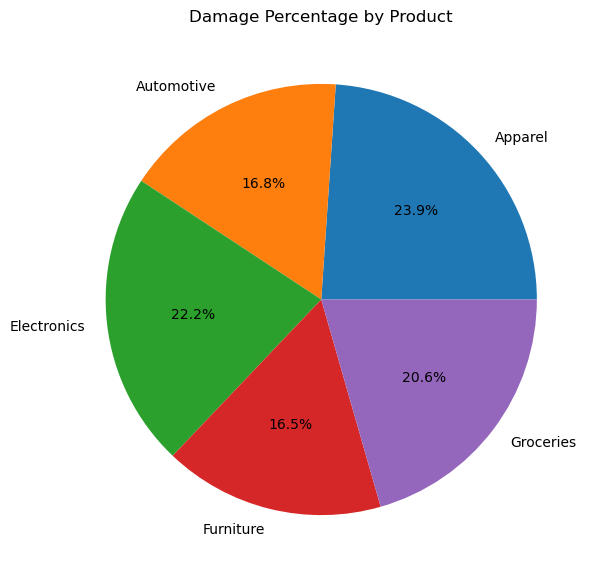

In [132]:
damage_by_product = df.groupby('Product_Category')['Damaged_Goods'].sum()

plt.figure(figsize=(7,7))
plt.pie(damage_by_product,
        labels=damage_by_product.index,
        autopct='%1.1f%%')
plt.title('Damage Percentage by Product')
plt.show()


##### sum of Demand_forecast, sum of monthly_sales by warehouse_id

In [135]:

# group by warehouse
warehouse_summary = df.groupby("Warehouse_ID").agg({
    "Demand_Forecast": "sum",
    "Monthly_Sales": "sum"
}).reset_index()



In [137]:
top10 = warehouse_summary.sort_values(
    by="Demand_Forecast", ascending=False
).head(10)


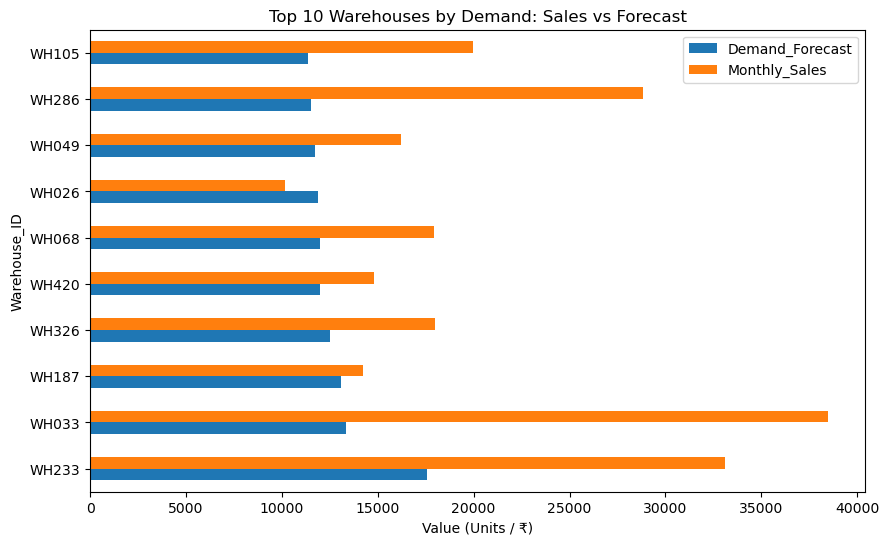

In [139]:
top10.set_index("Warehouse_ID")[["Demand_Forecast", "Monthly_Sales"]].plot(
    kind="barh", figsize=(10,6)
)

plt.title("Top 10 Warehouses by Demand: Sales vs Forecast")
plt.xlabel("Value (Units / ₹)")
plt.show()


In [141]:
#### Top 10 

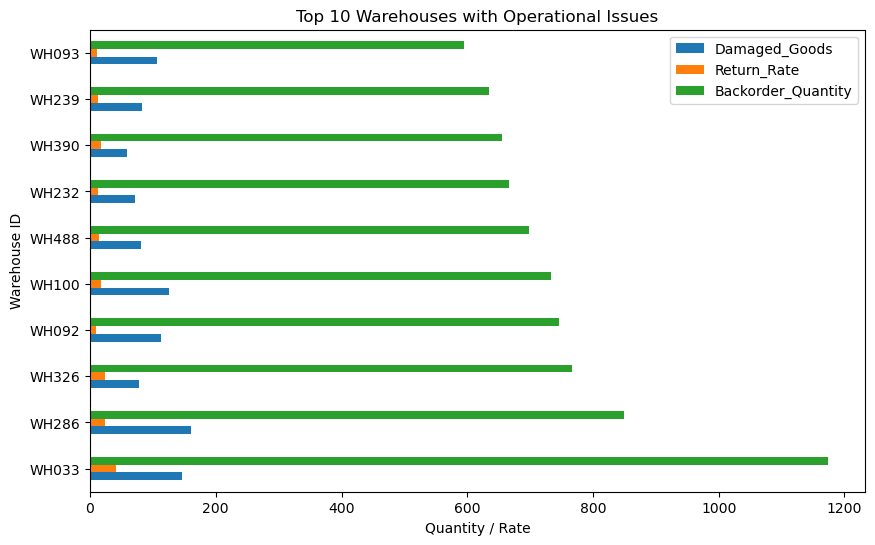

In [143]:
warehouse_issues = df.groupby("Warehouse_ID").agg({
    "Damaged_Goods": "sum",
    "Return_Rate": "sum",
    "Backorder_Quantity": "sum"
}).reset_index()

top10_issues = warehouse_issues.sort_values(
    by="Backorder_Quantity", ascending=False
).head(10)


top10_issues.set_index("Warehouse_ID")[[
    "Damaged_Goods",
    "Return_Rate",
    "Backorder_Quantity"
]].plot(kind="barh", figsize=(10,6))

plt.title("Top 10 Warehouses with Operational Issues")
plt.xlabel("Quantity / Rate")
plt.ylabel("Warehouse ID")
plt.legend()
plt.show()


In [145]:

# Aggregate at warehouse level
w = df.groupby("Warehouse_ID").agg({
    "Monthly_Sales": "sum",
    "Operational_Cost": "sum",
    "Employee_Count": "mean"
}).reset_index()

# Metrics
w["Sales_per_Employee"] = w["Monthly_Sales"] / w["Employee_Count"]
w["Cost_per_Employee"] = w["Operational_Cost"] / w["Employee_Count"]

# Benchmarks
avg_sales = w["Sales_per_Employee"].mean()
avg_cost = w["Cost_per_Employee"].mean()


In [147]:
# Action rule
w["Action"] = w.apply(
    lambda x: "Reduce Workforce"
    if (x["Cost_per_Employee"] > avg_cost and
        x["Sales_per_Employee"] < avg_sales)
    else "Efficient",
    axis=1
)

# Color mapping
w["Color"] = w["Action"].map({
    "Reduce Workforce": "red",
    "Efficient": "green"
})


In [149]:
# Create sort priority
w["Action_Sort"] = w["Action"].map({
    "Reduce Workforce": 0,
    "Efficient": 1
})


In [151]:
w_sorted = w.sort_values("Action_Sort")


#### employee reduction warehouses

In [154]:
styled_table = w_sorted[[
    "Warehouse_ID",
    "Sales_per_Employee",
    "Cost_per_Employee",
    "Action"
]].style.apply(
    lambda row: [
        "background-color: red" if row.Action == "Reduce Workforce"
        else "background-color: lightgreen"
        if col == "Action" else ""
        for col in row.index
    ],
    axis=1
)

styled_table


,Warehouse_ID,Sales_per_Employee,Cost_per_Employee,Action
194,WH314,160.888889,10334.222222,Reduce Workforce
199,WH324,153.500000,8191.833333,Reduce Workforce
26,WH037,147.705882,3547.764706,Reduce Workforce
248,WH401,143.106122,3012.232653,Reduce Workforce
251,WH407,168.833333,11517.333333,Reduce Workforce
210,WH343,148.888889,5041.296296,Reduce Workforce
208,WH341,194.008264,4963.413223,Reduce Workforce
179,WH290,173.010989,3159.912088,Reduce Workforce
278,WH455,206.058824,3715.558824,Reduce Workforce
38,WH055,206.330275,2820.293578,Reduce Workforce


#### Longest distance Warehouses

In [157]:
df["distance"] = (
    df["Lead_Time_Days"] + df["Shipping_Time_Days"]
)


In [159]:
location_distance = (
    df.groupby("Location")
      .agg(
          avg_distance=("distance", "mean"),
          total_transport_cost=("Transportation_Cost", "sum"),
          warehouse_count=("Warehouse_ID", "nunique")
      )
      .reset_index()
)


In [161]:
avg_dist = location_distance["avg_distance"].mean()

location_distance["distance_level"] = location_distance["avg_distance"].apply(
    lambda x: "Large Distance" if x > avg_dist else "Normal Distance"
)

location_distance.sort_values("avg_distance", ascending=False)


,Location,avg_distance,total_transport_cost,warehouse_count,distance_level
1,Chicago,10.727273,328535,43,Large Distance
7,New York,10.388889,375054,51,Large Distance
3,Denver,10.282609,341322,44,Large Distance
2,Dallas,10.254902,407593,49,Large Distance
6,Miami,10.125000,458645,54,Large Distance
5,Los Angeles,9.962963,450652,52,Large Distance
0,Atlanta,9.890909,488118,51,Large Distance
8,San Francisco,9.538462,398760,49,Normal Distance
4,Houston,9.068182,383508,43,Normal Distance
9,Seattle,8.636364,368356,41,Normal Distance


In [163]:
top_far_locations = location_distance.sort_values(
    "avg_distance", ascending=False
).head(7)

top_far_locations


,Location,avg_distance,total_transport_cost,warehouse_count,distance_level
1,Chicago,10.727273,328535,43,Large Distance
7,New York,10.388889,375054,51,Large Distance
3,Denver,10.282609,341322,44,Large Distance
2,Dallas,10.254902,407593,49,Large Distance
6,Miami,10.125000,458645,54,Large Distance
5,Los Angeles,9.962963,450652,52,Large Distance
0,Atlanta,9.890909,488118,51,Large Distance


####High Operational cost but lower sales

In [166]:

# Aggregate at warehouse level
w = df.groupby("Warehouse_ID").agg(
    Location=("Location", "first"),
    Total_Sales=("Monthly_Sales", "sum"),
    Total_Operational_Cost=("Operational_Cost", "sum")
).reset_index()


In [168]:
avg_sales = w["Total_Sales"].mean()
avg_cost = w["Total_Operational_Cost"].mean()


In [170]:
w["Profitability_Status"] = w.apply(
    lambda x: "Unprofitable"
    if (x["Total_Operational_Cost"] > avg_cost and
        x["Total_Sales"] < avg_sales)
    else "Profitable / Review",
    axis=1
)


In [172]:
unprofitable = w[w["Profitability_Status"] == "Unprofitable"] \
                .sort_values("Total_Operational_Cost", ascending=False)

unprofitable


,Warehouse_ID,Location,Total_Sales,Total_Operational_Cost,Profitability_Status
146,WH232,Los Angeles,8140,247262,Unprofitable
208,WH341,New York,7825,200191,Unprofitable
118,WH189,San Francisco,3342,193704,Unprofitable
288,WH471,Chicago,3393,182113,Unprofitable
145,WH228,New York,7306,164215,Unprofitable
239,WH390,Dallas,7416,163576,Unprofitable
140,WH221,Dallas,7951,161940,Unprofitable
186,WH303,Miami,7335,156867,Unprofitable
12,WH018,Miami,7228,154971,Unprofitable
113,WH181,Denver,7900,154347,Unprofitable


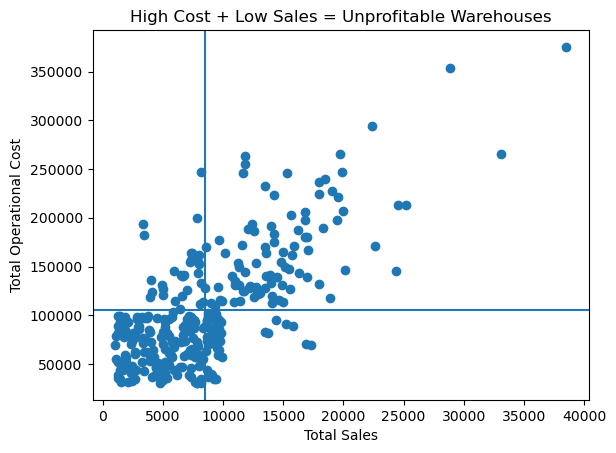

In [174]:


plt.figure()
plt.scatter(
    w["Total_Sales"],
    w["Total_Operational_Cost"]
)

# Reference lines
plt.axvline(avg_sales)
plt.axhline(avg_cost)

plt.xlabel("Total Sales")
plt.ylabel("Total Operational Cost")
plt.title("High Cost + Low Sales = Unprofitable Warehouses")

plt.show()
